In [10]:
import pandas as pd
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,21.075333,21.205334,20.416668,21.048668,21.048668,93417000
1,2018-02-13,21.001333,21.612667,20.834000,21.577333,21.577333,68403000
2,2018-02-14,21.389334,21.744667,21.234667,21.487333,21.487333,59260500
3,2018-02-15,21.633333,22.274668,21.493334,22.271334,22.271334,88693500
4,2018-02-16,22.166668,22.874666,22.109333,22.365999,22.365999,84639000
...,...,...,...,...,...,...,...
1254,2023-02-06,193.009995,198.169998,189.919998,194.759995,194.759995,186188100
1255,2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
1256,2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
1257,2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400


In [11]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2018-02-12,21.048668
1,2018-02-13,21.577333
2,2018-02-14,21.487333
3,2018-02-15,22.271334
4,2018-02-16,22.365999
...,...,...
1254,2023-02-06,194.759995
1255,2023-02-07,196.809998
1256,2023-02-08,201.289993
1257,2023-02-09,207.320007


In [12]:
df['Date']

0       2018-02-12
1       2018-02-13
2       2018-02-14
3       2018-02-15
4       2018-02-16
           ...    
1254    2023-02-06
1255    2023-02-07
1256    2023-02-08
1257    2023-02-09
1258    2023-02-10
Name: Date, Length: 1259, dtype: object

In [13]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [14]:
df

,Date,Close
0,2018-02-12,21.048668
1,2018-02-13,21.577333
2,2018-02-14,21.487333
3,2018-02-15,22.271334
4,2018-02-16,22.365999
...,...,...
1254,2023-02-06,194.759995
1255,2023-02-07,196.809998
1256,2023-02-08,201.289993
1257,2023-02-09,207.320007


In [15]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/9x/ypbrtrgx0g70v5b4trsl7n040000gn/T/ipykernel_68247/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-02-12
1      2018-02-13
2      2018-02-14
3      2018-02-15
4      2018-02-16
          ...    
1254   2023-02-06
1255   2023-02-07
1256   2023-02-08
1257   2023-02-09
1258   2023-02-10
Name: Date, Length: 1259, dtype: datetime64[ns]

In [16]:
df.index = df.pop('Date')
df

,Close
Date,
2018-02-12,21.048668
2018-02-13,21.577333
2018-02-14,21.487333
2018-02-15,22.271334
2018-02-16,22.365999
...,...
2023-02-06,194.759995
2023-02-07,196.809998
2023-02-08,201.289993


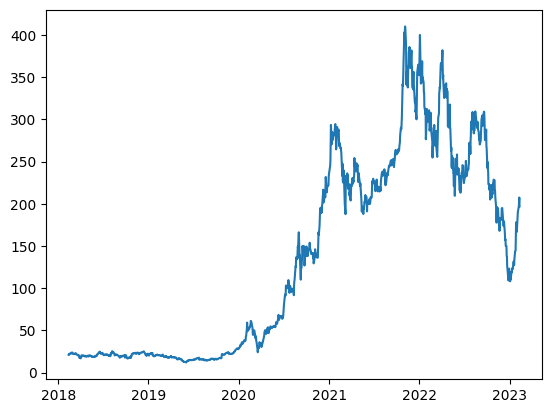

In [17]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [18]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,223.333328,220.720001,210.089996,213.463333
1,2021-03-26,220.720001,210.089996,213.463333,206.236664
2,2021-03-29,210.089996,213.463333,206.236664,203.763336
3,2021-03-30,213.463333,206.236664,203.763336,211.873337
4,2021-03-31,206.236664,203.763336,211.873337,222.643326
...,...,...,...,...,...
247,2022-03-17,255.456665,267.296661,280.076660,290.533325
248,2022-03-18,267.296661,280.076660,290.533325,301.796661
249,2022-03-21,280.076660,290.533325,301.796661,307.053345
250,2022-03-22,290.533325,301.796661,307.053345,331.326660


In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

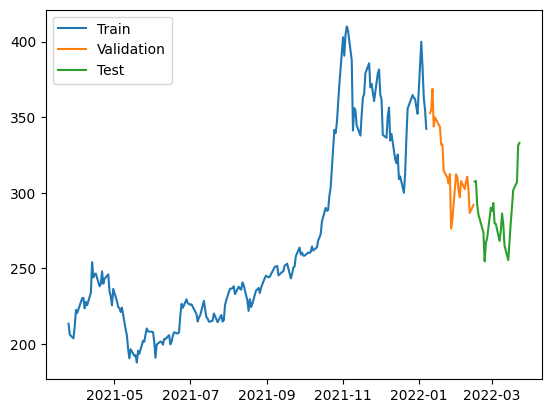

In [20]:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])